# Social Media Sentiment Analysis using Saf-Twitter Dataset:

In [54]:
# Importing Neccesary Libs
import pandas as pd
import numpy as np
import re
import string

### load the data for upto 31st March

In [46]:

file = pd.read_csv('safaricom_tweets.csv')
file.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Wa-Pots,Itsa_Kumquat,2021-03-31T12:03:51.000Z,Wed Mar 31 12:03:51 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Reply,NaN,0,1,NaN,NaN,NaN,NaN,NaN
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,Leilati,LeilaaAbubakar,2021-03-31T12:03:05.000Z,Wed Mar 31 12:03:05 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,1,NaN,NaN,NaN,NaN,NaN
2,1377229925032280064,RT @KUcoolkid : Are you in online business and...,iamlayaway,layawayuno,2021-03-31T12:02:56.000Z,Wed Mar 31 12:02:56 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo,https://pbs.twimg.com/media/ExzlwbuWUAEXRcz.jpg,NaN,NaN,NaN
3,1377229854312169473,RT @Liberal_KE : Enjoy YouTube music with safa...,Kiilu Kutoka Kitui 👽,mutuahkiilu,2021-03-31T12:02:39.000Z,Wed Mar 31 12:02:39 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo,https://pbs.twimg.com/media/Exzm8SAWEAMe0qF.jpg,NaN,NaN,NaN
4,1377229662917685251,RT @DARSIL254 : Which Paybill are you using if...,Boychild UNDER Siege😠,DARSIL254,2021-03-31T12:01:53.000Z,Wed Mar 31 12:01:53 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo,https://pbs.twimg.com/media/ExziJdoWYAY-0tA.jpg,NaN,NaN,NaN


## View Columns

In [25]:
file.columns

Index(['Tweet Id', 'Text', 'Name', 'Screen Name', 'UTC', 'Created At',
       'Favorites', 'Retweets', 'Language', 'Client', 'Tweet Type', 'URLs',
       'Hashtags', 'Mentions', 'Media Type', 'Media URLs', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'],
      dtype='object')

## View Rows and Columns

In [26]:
file.shape

print(f"The Data has {file.shape[0]} rows and {file.shape[1]} columns")

The Data has 4161 rows and 19 columns


### Select the meaningfull columns and create a new df

In [47]:
df = file[["Tweet Id", "Text", "Screen Name"]]
df.head()


,Tweet Id,Text,Screen Name
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Itsa_Kumquat
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,LeilaaAbubakar
2,1377229925032280064,RT @KUcoolkid : Are you in online business and...,layawayuno
3,1377229854312169473,RT @Liberal_KE : Enjoy YouTube music with safa...,mutuahkiilu
4,1377229662917685251,RT @DARSIL254 : Which Paybill are you using if...,DARSIL254


## Data Cleaning & Pre-Processing

 - Tokenization [breaking down a text or a sequence of characters into smaller units, usually words or subwords]
 - Lemmertization [educing words to their base or root form, known as a lemma, eg run, running and ran would be just run]
 - Remove Punctuation Tags 
 - Remove Emojis
 - Strip Numerical Values
 - Remove Stop Words

In [28]:
# tokenizor for words
from nltk.tokenize import word_tokenize

In [48]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/mumo98/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [49]:
# for emoji identify and delete form the text
import emoji
def tokenize_tweets(text):
    # emove emojis
    text = emoji.demojize(text)
    # remove urls
    text = re.sub('http[s]?://\S+', '', text)
    # remove punctuation marks
    text = re.sub(r'[^\w\s]', '', text)
    # remove numbers
    text = re.sub('[0-9]+', '', text)
    text = word_tokenize(text)

    return text

df["Tweets"] = df["Text"].apply(lambda x: tokenize_tweets(x))




/tmp/ipykernel_31729/2155571954.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tweets"] = df["Text"].apply(lambda x: tokenize_tweets(x))


In [50]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words("english")

df["stop_words"] = df["Tweets"].apply(lambda x: [w for w in x if w in stop])
df["Tweets"] = df["Tweets"].apply(lambda x: [w.lower() for w in x if w not in stop])

df.head(2)

[nltk_data] Downloading package stopwords to /home/mumo98/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipykernel_31729/1152308683.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stop_words"] = df["Tweets"].apply(lambda x: [w for w in x if w in stop])
/tmp/ipykernel_31729/1152308683.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tweets"] = df["Tweets"].apply(lambda x: [w.lower() for w in x if w not in stop])


,Tweet Id,Text,Screen Name,Tweets,stop_words
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Itsa_Kumquat,"[safaricom_care, i, done, many, times, still, ...","[have, that, and, i, the]"
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,LeilaaAbubakar,"[rt, elainesoya, mwangideloh, in, garissa, beh...",[]
2,1377229925032280064,RT @KUcoolkid : Are you in online business and...,layawayuno,"[rt, kucoolkid, are, online, business, keep, r...","[you, in, and, you, out, of, no, more, and]"
3,1377229854312169473,RT @Liberal_KE : Enjoy YouTube music with safa...,mutuahkiilu,"[rt, liberal_ke, enjoy, youtube, music, safari...","[with, after]"
4,1377229662917685251,RT @DARSIL254 : Which Paybill are you using if...,DARSIL254,"[rt, darsil, which, paybill, using, buy, safar...","[are, you, if, not, to]"
5,1377229576452124675,RT @ReubenKigame : Before I am told to be grat...,JohnNakholi,"[rt, reubenkigame, before, i, told, grateful, ...","[am, to, be, about, and, from, and, other, the..."
6,1377229563986653191,"RT @KUcoolkid : Usi reverse call tena, you can...",Liberal_KE,"[rt, kucoolkid, usi, reverse, call, tena, buy,...","[you, can, now, you, have, in, your, you, can]"
7,1377229517903835140,Enjoy YouTube music with safaricom YouTube bun...,Liberal_KE,"[enjoy, youtube, music, safaricom, youtube, bu...","[with, after]"
8,1377229516926550020,#UnlockOurkenya\n\n#Safaricom Plc kindly bring...,MrRetwetts,"[unlockourkenya, safaricom, plc, kindly, bring...","[the, for, and, below, in, these]"
9,1377229513868906497,RT @KUcoolkid : Are you in online business and...,DARSIL254,"[rt, kucoolkid, are, online, business, keep, r...","[you, in, and, you, out, of, no, more, and]"


In [51]:
# we convert to natural language form eg many to mani for heuristics

from nltk.stem.porter import *
stemmer = PorterStemmer()
df["Tweets"] = df["Tweets"].apply(lambda x: [stemmer.stem(w) for w in x])
df.head(2)

/tmp/ipykernel_31729/1701023557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tweets"] = df["Tweets"].apply(lambda x: [stemmer.stem(w) for w in x])


,Tweet Id,Text,Screen Name,Tweets,stop_words
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Itsa_Kumquat,"[safaricom_car, i, done, mani, time, still, ge...","[have, that, and, i, the]"
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,LeilaaAbubakar,"[rt, elainesoya, mwangideloh, in, garissa, beh...",[]


In [61]:
string.punctuation

def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', "", text)
    return text

df["non_punctuation_marks"] = df["Tweets"].apply(lambda x: remove_punct(x))
df.head(5)   

/tmp/ipykernel_31729/652326177.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["non_punctuation_marks"] = df["Tweets"].apply(lambda x: remove_punct(x))


,Tweet Id,Text,Screen Name,Tweets,stop_words,punctuation_marks,non_punctuation_marks
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Itsa_Kumquat,"[safaricom_car, i, done, mani, time, still, ge...","[have, that, and, i, the]",safaricom_car i done mani time still get messag,safaricom_car i done mani time still get messag
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,LeilaaAbubakar,"[rt, elainesoya, mwangideloh, in, garissa, beh...",[],rt elainesoya mwangideloh in garissa behind ji...,rt elainesoya mwangideloh in garissa behind ji...
2,1377229925032280064,RT @KUcoolkid : Are you in online business and...,layawayuno,"[rt, kucoolkid, are, onlin, busi, keep, run, b...","[you, in, and, you, out, of, no, more, and]",rt kucoolkid are onlin busi keep run bundl wor...,rt kucoolkid are onlin busi keep run bundl wor...
3,1377229854312169473,RT @Liberal_KE : Enjoy YouTube music with safa...,mutuahkiilu,"[rt, liberal_k, enjoy, youtub, music, safarico...","[with, after]",rt liberal_k enjoy youtub music safaricom yout...,rt liberal_k enjoy youtub music safaricom yout...
4,1377229662917685251,RT @DARSIL254 : Which Paybill are you using if...,DARSIL254,"[rt, darsil, which, paybil, use, buy, safarico...","[are, you, if, not, to]",rt darsil which paybil use buy safaricom airti...,rt darsil which paybil use buy safaricom airti...


## Data Visualizations (Word Cloud)

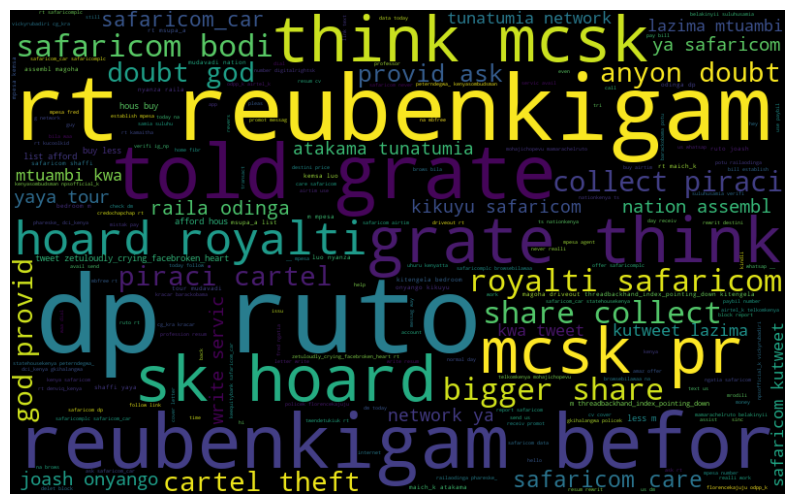

In [65]:
import matplotlib.pyplot as plt
all_words = ' '.join([text for text in df["non_punctuation_marks"]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Get most frequent words

In [67]:
from collections import Counter

cnt = Counter()
for text in df['non_punctuation_marks']:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)

[('safaricom', 1586),
 ('rt', 974),
 ('i', 723),
 ('safaricom_car', 610),
 ('mpesa', 428),
 ('get', 344),
 ('share', 300),
 ('m', 267),
 ('safaricomplc', 265),
 ('ruto', 259)]

## Import of SKLEARN and Libs

In [70]:
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

<h4>Getting sentiments label</h4>


In [73]:
def sentiment_score_compound(sent):
    score = analyzer.polarity_scores(sent)
    return score['compound']
    
def sentiment_score_pos(sent):
    score = analyzer.polarity_scores(sent)
    return score['pos']
    
def sentiment_score_neg(sent):
    score = analyzer.polarity_scores(sent)
    return score['neg']

def sentiment_score_neu(sent):
    score = analyzer.polarity_scores(sent)
    return score['neu']

df['tweets_sent_compound'] = df['non_punctuation_marks'].apply(lambda x: sentiment_score_compound(x))
df['tweets_sent_pos'] = df['non_punctuation_marks'].apply(lambda x: sentiment_score_pos(x))
df['tweets_sent_neg'] = df['non_punctuation_marks'].apply(lambda x: sentiment_score_neg(x))
df['tweets_sent_neu'] = df['non_punctuation_marks'].apply(lambda x: sentiment_score_neu(x))

df.head(5)

/tmp/ipykernel_31729/216510716.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweets_sent_compound'] = df['non_punctuation_marks'].apply(lambda x: sentiment_score_compound(x))
/tmp/ipykernel_31729/216510716.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweets_sent_pos'] = df['non_punctuation_marks'].apply(lambda x: sentiment_score_pos(x))
/tmp/ipykernel_31729/216510716.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Tweet Id,Text,Screen Name,Tweets,stop_words,punctuation_marks,non_punctuation_marks,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg,tweets_sent_neu
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Itsa_Kumquat,"[safaricom_car, i, done, mani, time, still, ge...","[have, that, and, i, the]",safaricom_car i done mani time still get messag,safaricom_car i done mani time still get messag,0.0000,0.000,0.0,1.000
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,LeilaaAbubakar,"[rt, elainesoya, mwangideloh, in, garissa, beh...",[],rt elainesoya mwangideloh in garissa behind ji...,rt elainesoya mwangideloh in garissa behind ji...,0.0000,0.000,0.0,1.000
2,1377229925032280064,RT @KUcoolkid : Are you in online business and...,layawayuno,"[rt, kucoolkid, are, onlin, busi, keep, run, b...","[you, in, and, you, out, of, no, more, and]",rt kucoolkid are onlin busi keep run bundl wor...,rt kucoolkid are onlin busi keep run bundl wor...,0.0000,0.000,0.0,1.000
3,1377229854312169473,RT @Liberal_KE : Enjoy YouTube music with safa...,mutuahkiilu,"[rt, liberal_k, enjoy, youtub, music, safarico...","[with, after]",rt liberal_k enjoy youtub music safaricom yout...,rt liberal_k enjoy youtub music safaricom yout...,0.4939,0.211,0.0,0.789
4,1377229662917685251,RT @DARSIL254 : Which Paybill are you using if...,DARSIL254,"[rt, darsil, which, paybil, use, buy, safarico...","[are, you, if, not, to]",rt darsil which paybil use buy safaricom airti...,rt darsil which paybil use buy safaricom airti...,0.0000,0.000,0.0,1.000


In [74]:
df.tail()

,Tweet Id,Text,Screen Name,Tweets,stop_words,punctuation_marks,non_punctuation_marks,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg,tweets_sent_neu
4156,1372032135259906059,Peter_kibiro,2021-03-17T03:49:07.000Z,[peter_kibiro],[],peter_kibiro,peter_kibiro,0.0,0.0,0.0,1.0
4157,1372032135259906059,Peter_kibiro,2021-03-17T03:49:07.000Z,[peter_kibiro],[],peter_kibiro,peter_kibiro,0.0,0.0,0.0,1.0
4158,1245493115844263937,Kelbac Omariba 𒊹︎︎︎,2020-04-01T23:28:06.000Z,"[kelbac, omariba, 𒊹]",[],kelbac omariba 𒊹,kelbac omariba 𒊹,0.0,0.0,0.0,1.0
4159,981797847216599040,Style by Ray,2018-04-05T07:37:02.000Z,"[style, ray]",[by],style ray,style ray,0.0,0.0,0.0,1.0
4160,981797847216599040,Style by Ray,2018-04-05T07:37:02.000Z,"[style, ray]",[by],style ray,style ray,0.0,0.0,0.0,1.0


In [78]:
wordList = nltk.FreqDist(all_words)
word_features = wordList.keys()

### Vectorization

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
tweets_list = []
for tweet in df["non_punctuation_marks"]:
    tweets_list.append(tweet)

len(tweets_list)

4161

In [84]:

X = df["non_punctuation_marks"]

vec = TfidfVectorizer(min_df = 5, max_df = 0.95, sublinear_tf = True, use_idf = True, ngram_range = (1, 2))

In [85]:
len(all_words)

310671

In [88]:
def label_val(val):
    if val < 0:
        return 0
    elif val == 0:
        return 1
    else:
        return 2

df['label'] = df["tweets_sent_compound"].apply( lambda x: label_val(x))
df.head(2)

/tmp/ipykernel_31729/1862121883.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df["tweets_sent_compound"].apply( lambda x: label_val(x))


,Tweet Id,Text,Screen Name,Tweets,stop_words,punctuation_marks,non_punctuation_marks,tweets_sent_compound,tweets_sent_pos,tweets_sent_neg,tweets_sent_neu,label
0,1377230154108395526,@Safaricom_Care I have done that many times an...,Itsa_Kumquat,"[safaricom_car, i, done, mani, time, still, ge...","[have, that, and, i, the]",safaricom_car i done mani time still get messag,safaricom_car i done mani time still get messag,0.0,0.0,0.0,1.0,1
1,1377229963661819914,RT @Elainesoya : @mwangideloh In Garissa behin...,LeilaaAbubakar,"[rt, elainesoya, mwangideloh, in, garissa, beh...",[],rt elainesoya mwangideloh in garissa behind ji...,rt elainesoya mwangideloh in garissa behind ji...,0.0,0.0,0.0,1.0,1


In [90]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary = True)
cv.fit(tweets_list)
X = cv.transform(tweets_list)
y = df['label'].values

## Clasiification Model

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.2, random_state = 0
)

In [92]:
## Logitistc regression

In [93]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [94]:
pred = lr.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

0.8789426254130369
              precision    recall  f1-score   support

           0       0.89      0.27      0.41       237
           1       0.87      0.99      0.92      2238
           2       0.92      0.75      0.83       854

    accuracy                           0.88      3329
   macro avg       0.89      0.67      0.72      3329
weighted avg       0.88      0.88      0.86      3329

[[  64  136   37]
 [   2 2218   18]
 [   6  204  644]]


<h1>tf-idf vectorization</h1>

In [96]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(tweets_list)
X = tfidf_vectorizer.transform(tweets_list)
y = df["label"].values

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.2, random_state = 0
)

In [97]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [98]:
pred = lr.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

0.8350856112946831
              precision    recall  f1-score   support

           0       1.00      0.16      0.27       237
           1       0.81      1.00      0.89      2238
           2       0.98      0.60      0.74       854

    accuracy                           0.84      3329
   macro avg       0.93      0.58      0.63      3329
weighted avg       0.86      0.84      0.81      3329

[[  37  195    5]
 [   0 2234    4]
 [   0  345  509]]


## Support Vector Machine


In [99]:
from sklearn.svm import LinearSVC
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 3))
ngram_vectorizer.fit(tweets_list)
X = ngram_vectorizer.transform(tweets_list)
y = df["label"].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.2, random_state = 0
)
svm = LinearSVC()
svm.fit(X_train, y_train)

/home/mumo98/anaconda3/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [100]:
pred = svm.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

0.8648242715530189
              precision    recall  f1-score   support

           0       0.97      0.24      0.38       237
           1       0.84      1.00      0.91      2238
           2       0.96      0.69      0.81       854

    accuracy                           0.86      3329
   macro avg       0.92      0.64      0.70      3329
weighted avg       0.88      0.86      0.85      3329

[[  56  163   18]
 [   1 2232    5]
 [   1  262  591]]


<h1>Naïve Bayes classifier</h1>


In [101]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_val)
print(accuracy_score(y_val, pred))
print(classification_report(y_val, pred))
print(confusion_matrix(y_val, pred))

0.8753379393211175
              precision    recall  f1-score   support

           0       0.46      0.72      0.56       237
           1       0.95      0.93      0.94      2238
           2       0.87      0.78      0.82       854

    accuracy                           0.88      3329
   macro avg       0.76      0.81      0.77      3329
weighted avg       0.89      0.88      0.88      3329

[[ 170   29   38]
 [  96 2081   61]
 [ 102   89  663]]
